In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor # Random forest regressor 
from sklearn.model_selection import train_test_split # splitting dataset into te"
import seaborn as sns


In [4]:
# Load the dataset
df = pd.read_csv("C:/Users/Rohit.LAPTOP-PHGLVP9F/Desktop/AIE/S4/Club/Life-Expectancy-Data-Updated.csv")

In [5]:
df.shape #shape of the dataset

(2864, 21)

In [6]:
df.head() #first five rows of the dataset

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Target  
0                         0                          1    76.5  
1                         1                          0    82.8  
2                         0                          1    65.4  
3                         0                          1    67.0  
4                         1                          0    81.7  

[5 rows x 21 columns]

In [7]:
df.info() #Details about the datatypes in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [8]:
df.isnull().sum() #checks for null values in the dataset by taking their sum

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Target                         0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

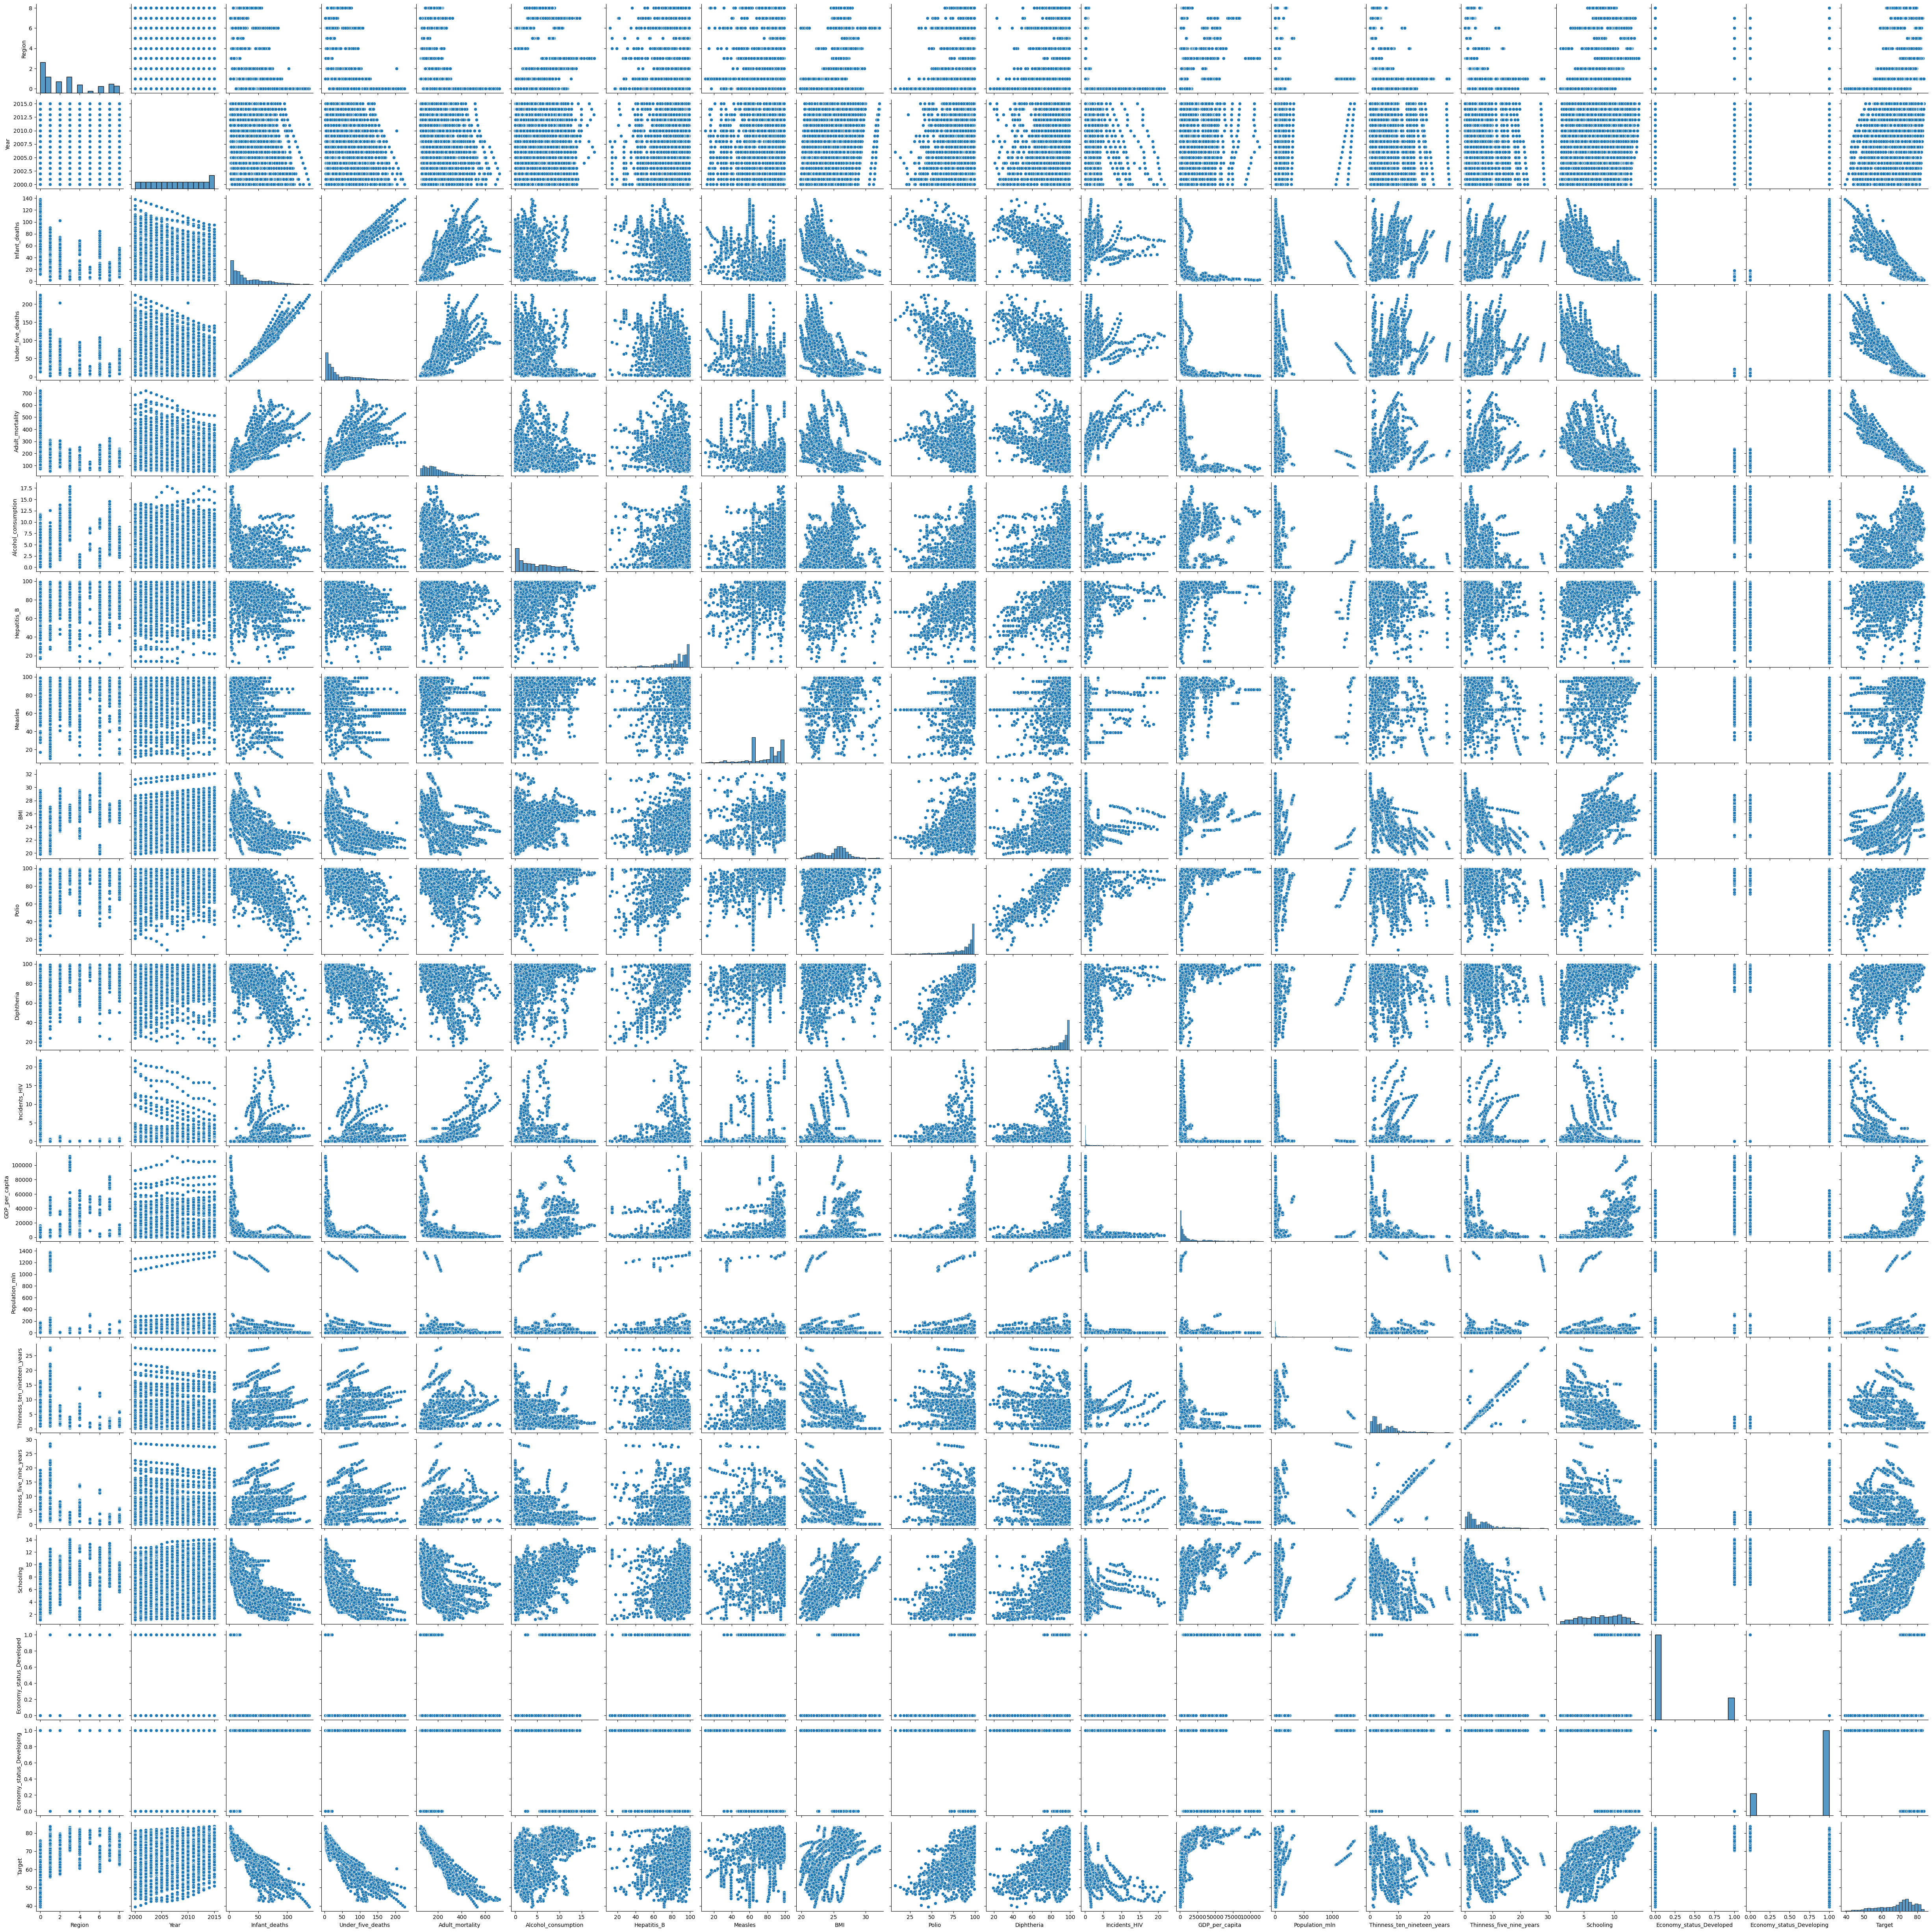

In [10]:
sns.pairplot(df)

C:\Users\Rohit.LAPTOP-PHGLVP9F\AppData\Local\Temp\ipykernel_24172\1558115162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr() #correlation heatmap in seaborn library


<AxesSubplot: >

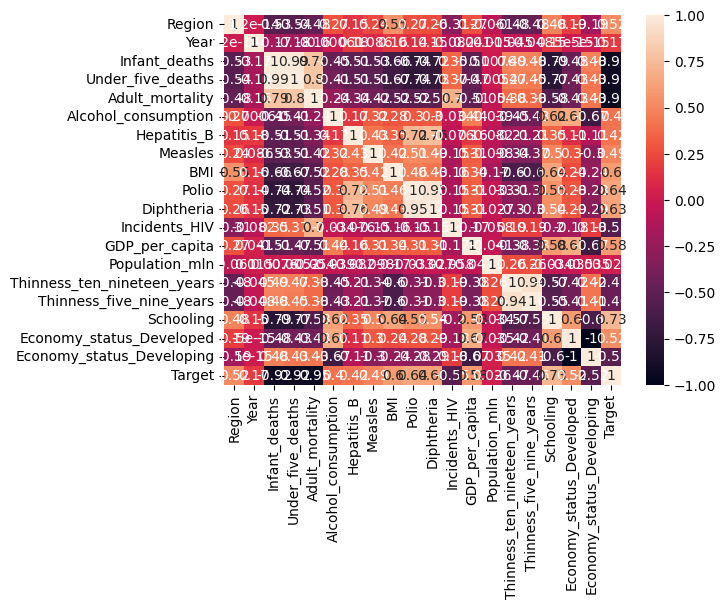

In [11]:
corr=df.corr() #correlation heatmap in seaborn library
sns.heatmap(corr,annot=True)

In [12]:
from sklearn.ensemble import RandomForestRegressor # Random forest regressor 
from sklearn.model_selection import train_test_split # splitting dataset into test and train
from sklearn.metrics import mean_squared_error # to find accuracy of prediction

In [14]:
# Split the dataset into features and target
X = df.drop(['Year','Country'], axis=1)
y = df['Target']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1718, 19) (1146, 19) (1718,) (1146,)


In [17]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(19,), activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse',metrics=['mae'])

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

In [21]:
loss, mse = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('MAE:', mse)

36/36 [==============================] - 1s 15ms/step - loss: 2.5076 - mae: 1.2081
Loss: 2.507598876953125
MAE: 1.2080645561218262


In [22]:
train_pred = model.predict(X_train)

54/54 [==============================] - 1s 14ms/step


In [23]:
test_pred = model.predict(X_test)

36/36 [==============================] - 1s 14ms/step


In [24]:
y_pred = model.predict(X_test)


36/36 [==============================] - 1s 14ms/step


In [25]:
r2 = r2_score(y_test, test_pred)
print('R-squared:', r2)

R-squared: 0.9700841669916225


In [26]:

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, train_pred)
accuracy_train = 1 - mse_train / y_train.var()

mse_test = mean_squared_error(y_test, test_pred)
accuracy_test = 1 - mse_test / y_test.var()

print("Accuracy on training set:", accuracy_train)
print("Accuracy on testing set:", accuracy_test)


Accuracy on training set: 0.9844758839862014
Accuracy on testing set: 0.9701102715579474


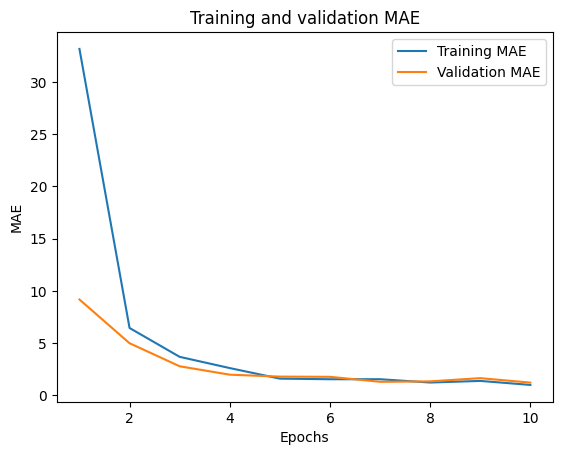

In [27]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy
train_acc = history.history['mae']
val_acc = history.history['val_mae']

# Get the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_acc, label='Training MAE')
plt.plot(epochs, val_acc, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


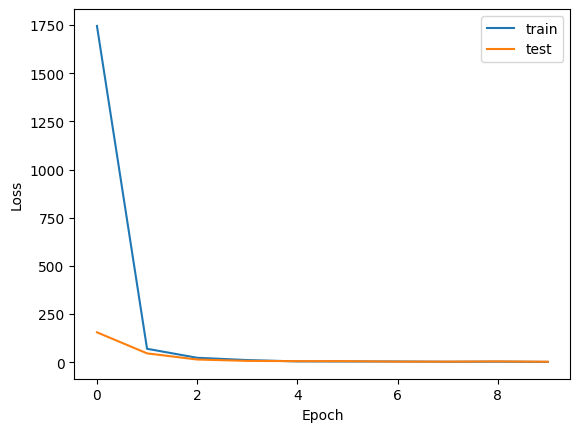

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()